# Matrix Layer rotation: Hackerrank challenge
- Author: Manu Jayadharan
- Date: 06-30-2020


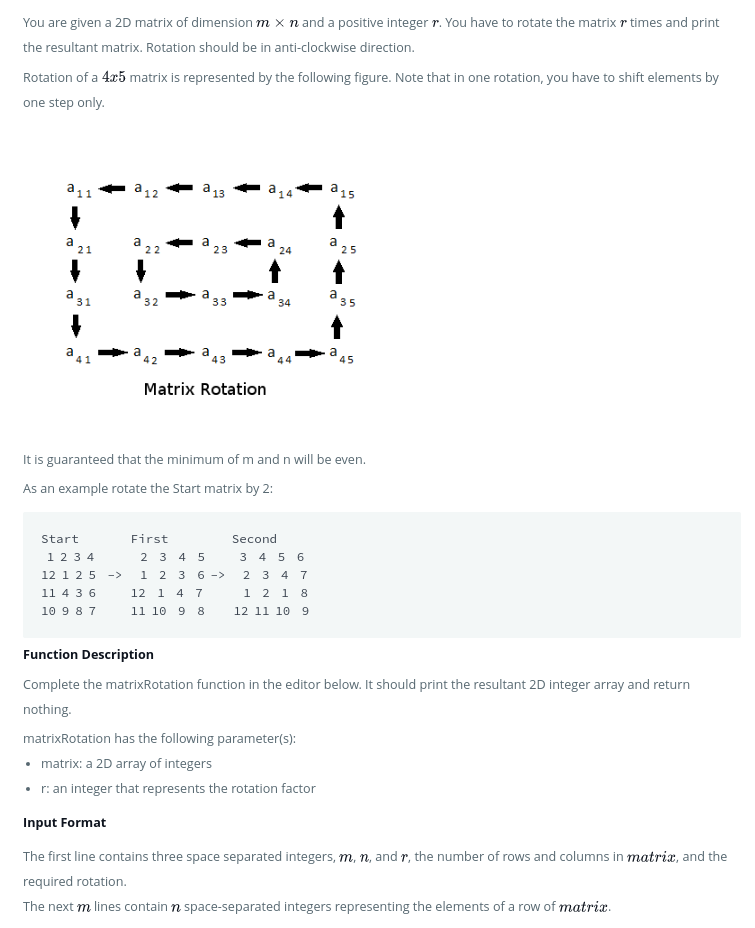

In [100]:
class MatrixLayerRotation:
    
    def __init__(self, arr):
        '''
        initialize the class with m x n 2D array: arr
        '''
        self.arr = arr
        self.r = 0 #number of rotations that need to be performed
        self.n = len(arr) #num of rows
        self.m = len(arr[0]) #numb of columns
    
    def one_layer_rotation(self, index_i, r):
        '''
        index_i(int): determines the layer of the matrix that needs to be rotated
        r(int): number of rotations that needs to be done
        '''
        num_els = 2*(self.n + self.m - 4*index_i -2) #num of elements in the layer
        vertical_len = self.n - 2*index_i #vertical height of the layer
        horizontal_len = self.m - 2*index_i #horizontal length of the layer
        temp_arr = [0]*num_els #array holding the matrix layer
        
        #extracting the elements of the layer of index_i
        temp_arr_filling = 0 #to keep track of where we are filling the temp_arr(matrix layer)
        temp_arr[temp_arr_filling:temp_arr_filling+vertical_len] = [self.arr[j][index_i] for j in range(index_i,self.n-index_i)]
        temp_arr_filling += vertical_len-1
        temp_arr[temp_arr_filling:temp_arr_filling+horizontal_len] = self.arr[self.n-index_i-1][index_i:self.m-index_i]
        temp_arr_filling += horizontal_len-1
        temp_arr[temp_arr_filling:temp_arr_filling+vertical_len] = [self.arr[j][self.m-index_i-1] for j in range(self.n-index_i-1,index_i-1,-1)]
        temp_arr_filling += vertical_len-1
        temp_arr[temp_arr_filling:temp_arr_filling+horizontal_len] = [self.arr[index_i][j] for j in range(self.m-index_i-1,index_i,-1)]
        self.arr[index_i][index_i:self.m-index_i:-1]
        
        #rotaing layer: updating the elements of self.arr
        #updating left part of layer
        temp_arr_ind = 0 #keeping track of corresponding el in temp_arr
        for j in range(index_i,self.n-index_i):
            self.arr[j][index_i] = temp_arr[(temp_arr_ind-r)%num_els]
            temp_arr_ind += 1
        #updating bottom part of layer
        temp_arr_ind -= 1
        for j in range(index_i,self.m-index_i):
            self.arr[self.n-index_i-1][j] = temp_arr[(temp_arr_ind-r)%num_els]
            temp_arr_ind += 1
        #updating right part of layer
        temp_arr_ind -= 1
        for j in range(self.n-index_i-1,index_i-1,-1):
            self.arr[j][self.m-index_i-1] = temp_arr[(temp_arr_ind-r)%num_els]
            temp_arr_ind +=1
        #updating top part of layer
        temp_arr_ind -= 1
        for j in range(self.m-index_i-1,index_i,-1):
            self.arr[index_i][j] = temp_arr[(temp_arr_ind-r)%num_els]
            temp_arr_ind +=1
            
    def rotate(self, r):
        '''
        r(int): rotate the all the layers of 2d matrix self.arr r number of times
        '''
        for i in range(min(self.n, self.m)//2):
            self.one_layer_rotation(i, r)
            
    def print_rows(self):
        '''
        print each row of self.arr on a new line
        '''
        for row in self.arr:
            print(" ".join(map(str,row)))
    

            

In [102]:
arr_list = [[i*5+j for j in range(1,6)] for i in range(4)]
print(arr_list)
matrix_rotation = MatrixLayerRotation(arr_list)
# matrix_rotation.one_layer_rotation(0,1)
# matrix_rotation.one_layer_rotation(1,1)
matrix_rotation.rotate(1)
# print(matrix_rotation.arr)
matrix_rotation.print_rows()

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15], [16, 17, 18, 19, 20]]
2 3 4 5 10
1 8 9 14 15
6 7 12 13 20
11 16 17 18 19
